In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
from respy import rperm

In [26]:
rp = rperm.BrooksCorey(swr=0.1, sor=0.2, k0rw=0.2, k0ro=1.0, nw=2, no=2)

In [27]:
Sw = np.linspace(0,1)
krw,kro = rp.get(Sw)

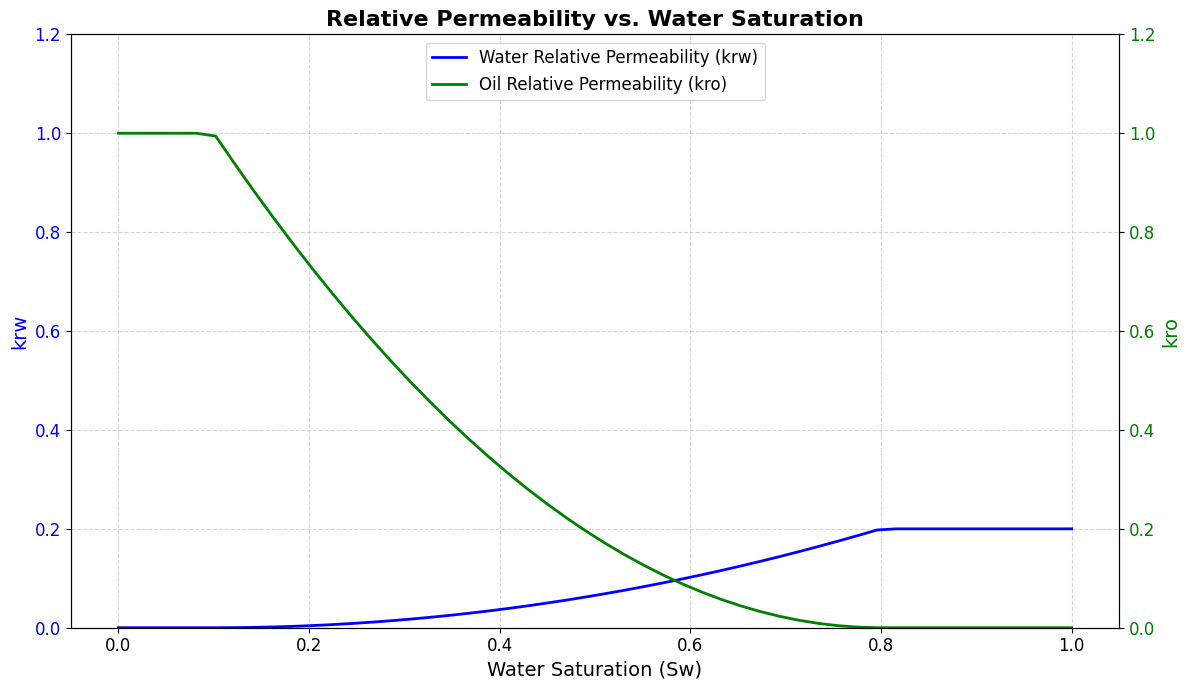

In [32]:
# Improved plot
fig, ax1 = plt.subplots(figsize=(12, 7))
ax2 = ax1.twinx()

# Plot water relative permeability
line1, = ax1.plot(Sw, krw, 'b-', label='Water Relative Permeability (krw)', linewidth=2, markersize=6)

# Plot oil relative permeability
line2, = ax2.plot(Sw, kro, 'g-', label='Oil Relative Permeability (kro)', linewidth=2, markersize=6)

# Titles and labels
ax1.set_title('Relative Permeability vs. Water Saturation', fontsize=16, fontweight='bold')
ax1.set_xlabel('Water Saturation (Sw)', fontsize=14)
ax1.set_ylabel('krw', color='b', fontsize=14)
ax2.set_ylabel('kro', color='g', fontsize=14)

# Y-axis limits
ax1.set_ylim(0, 1.2)
ax2.set_ylim(0, 1.2)

# Grid for readability
ax1.grid(True, linestyle='--', alpha=0.5)

# Combine legends
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper center', fontsize=12)

# Ticks customization
ax1.tick_params(axis='y', labelcolor='b')
ax2.tick_params(axis='y', labelcolor='g')
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

In [2]:
area = 20*1000
edge = 1000

In [3]:
rock_poro = 0.2
rock_perm = 100
rock_comp = 1e-6

In [4]:
oil_mu = 5
oil_comp = 1e-5
oil_fvf = 1

In [5]:
wat_mu = 0.5
wat_comp = 1e-6
wat_fvf = 1

In [6]:
init_press = 3000
init_swater = 0.2

In [7]:
def krw(Sw):
  return 0.2*((Sw-0.1)/(1-0.1-0.2))**2

In [8]:
def kro(Sw):
  return 1.0*(1.0-(Sw-0.1)/(1-0.1-0.2))**2

# IMPES

In [9]:
tdelta = 1.0

In [10]:
Rock = (rock_perm*area)/edge*1.06235016e-14

In [11]:
Rock

2.12470032e-11

In [12]:
Mw = krw(init_swater)/(wat_mu*wat_fvf)*(24*60*60)/1.4503774389728e-7
Tw = Rock*Mw

In [13]:
Tw

0.10332235622243502

In [14]:
Mo = kro(init_swater)/(oil_mu*oil_fvf)*(24*60*60)/1.4503774389728e-7
To = Rock*Mo

In [15]:
T = Tw+To

In [16]:
T

1.9631247682262647

In [17]:
def ct(cr,co,cw,Sw):
  return cr+Sw*cw+(1-Sw)*co

In [18]:
tcomp = ct(rock_comp,oil_comp,wat_comp,init_swater)

In [19]:
A = area*edge*rock_poro/tdelta

In [20]:
Act = A*tcomp

In [21]:
Act

36.800000000000004

In [22]:
Q = np.zeros((4,1))

In [23]:
Qw1 = 2000
Qo1 = 0

In [24]:
Q[0,0] = Qw1+Qo1

In [25]:
Qw4 = Mw/(Mw+Mo)*(-2000)

In [26]:
Qo4 = -2000-Qw4

In [27]:
Q[3,0] = Qw4+Qo4

In [28]:
Qw4

-105.26315789473688

In [29]:
Qo4

-1894.7368421052631

In [30]:
Q

array([[ 2000.],
       [    0.],
       [    0.],
       [-2000.]])

In [31]:
trans = np.zeros((4,4))
diag = np.zeros((4,4))

In [32]:
for i in range(4):
  if i == 0:
    trans[i,i] = 1
    trans[i,i+1] = -1
  elif i == 3:
    trans[i,i] = 1
    trans[i,i-1] = -1
  else:
    trans[i,i] = 2
    trans[i,i+1] = -1
    trans[i,i-1] = -1
  diag[i,i] = 1

In [33]:
diag

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [34]:
P = np.array([3000,3000,3000,3000]).reshape((-1,1))

In [35]:
P

array([[3000],
       [3000],
       [3000],
       [3000]])

In [36]:
LHS = T*trans+Act*diag

In [37]:
LHS

array([[38.76312477, -1.96312477,  0.        ,  0.        ],
       [-1.96312477, 40.72624954, -1.96312477,  0.        ],
       [ 0.        , -1.96312477, 40.72624954, -1.96312477],
       [ 0.        ,  0.        , -1.96312477, 38.76312477]])

In [41]:
RHS = np.matmul(Act*diag,P)+Q

In [42]:
RHS

array([[112400.],
       [110400.],
       [110400.],
       [108400.]])

In [43]:
np.linalg.solve(LHS,RHS)

array([[3051.71587053],
       [3002.37821959],
       [2997.62178041],
       [2948.28412947]])